In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import random
import time
from collections import defaultdict

# Import Data

In [2]:
train_data = torch.load('../../data/twitter/train_data.pt')
train_label = torch.load('../../data/twitter/train_label.pt')
test_data = torch.load('../../data/twitter/test_data.pt')
test_label = torch.load('../../data/twitter/test_label.pt')
print('number of tweets in training set:', len(train_data))
print('number of tweets in testing set:', len(test_data))

number of tweets in training set: 1428612
number of tweets in testing set: 150000


In [3]:
train_data[0:10]

[tensor([    0,   334,     0,   362,    21,     8,   124,    13,   106,    51,
          3615,     4,  1300,    21,    14,     7,   194, 10062,     2,    25,
           451,    17,     9,   187,    64]),
 tensor([  10,  990,   11, 1258,   48,   45, 1251,   66,    7,  280]),
 tensor([    0,     2,   106,    51,    11,   139,    40,     4,   124,   296,
         10609,    43,    88]),
 tensor([311,  51,   5,   7, 645,  39, 180,   3]),
 tensor([1967,    4,  825,    4,   59,    4,    7, 1269,   16,    6,  830,  123]),
 tensor([  488,     0,    20,   240,    11,    57,     5,     7, 15849,     4]),
 tensor([   7, 1434,  216,    5,  506,   74,    0,   12,   20,   36,   81,  107,
           13,  833,    8,   12,   20,   81,  107,   13,  941,    3,    3,    6,
            0]),
 tensor([ 3926, 28338,    31,  1831,     2,    49,    39,    68,     6,   229]),
 tensor([   26, 12250,     4,   459,  1771,   520,     5,   573,    65,    42]),
 tensor([  84,   12, 4255,    5,  280,    8,    2,   29,  

# Exploratory Analysis

In [4]:
word2idx = torch.load('../../data/twitter/word2idx.pt') # vocab
idx2word = torch.load('../../data/twitter/idx2word.pt')

word2idx_temp = defaultdict(lambda: 0)
for w, idx in word2idx.items():
     word2idx_temp[w] = idx
word2idx = word2idx_temp

print(len(word2idx))
print(len(idx2word))

30002
30002


In [5]:
word2idx

defaultdict(<function __main__.<lambda>()>,
            {'louder': 12439,
             'duffy': 24271,
             'hbo': 4808,
             '@fizzyduck': 12134,
             'shar': 24145,
             'shopped': 10738,
             'lacrosse': 12801,
             'rugrats': 16167,
             '@nathanaelb': 16430,
             'hhh': 28619,
             'arabic': 10297,
             'dutch': 4543,
             '@sn0wrose': 18199,
             'therefore': 4202,
             'eugene': 12947,
             'u.s': 10575,
             'lynne': 27201,
             'alexander': 9526,
             'jacksonville': 14925,
             'getn': 15878,
             'mw': 14849,
             'mamas': 8768,
             't3': 19840,
             'pom': 14811,
             'entertain': 4383,
             'relate': 5329,
             'fibro': 24312,
             '@jessicahamby': 27242,
             'fk': 15870,
             'cavities': 14375,
             'moran': 24940,
             'oot': 20486,


In [6]:
def text2tensor(text):
    text = text.lower()
    list_of_words = text.split()
    list_of_int = [word2idx[w] for w in list_of_words]
    x = torch.LongTensor(list_of_int)
    return x

def tensor2text(x):
    list_of_words = [idx2word[idx.item()] for idx in x]
    text = ' '.join(list_of_words)
    return text

### 0 = negative sentiment and 1 = positive sentiment

In [7]:
idx = 100000
x = train_data[idx]
print(tensor2text(x))
print(train_label[idx])

working on the mac ... trying to do a clean install of os ... not easy when you have been a pc all your life .
tensor(0)


This tweet is a negative sentiment.

In [8]:
idx = 35230
x = train_data[idx]
print(tensor2text(x))
print(train_label[idx])

<unk> sure thing , plz lemme know if you cook up any yummy recipes using olive oil butter !
tensor(1)


This tweet is a positive sentiment.

In [9]:
train_tweet = torch.load('../../data/twitter/train_actual_tweet.pt') # non encoded tweets
test_tweet = torch.load('../../data/twitter/test_actual_tweet.pt')

In [10]:
train_tweet[100000]

'Working on the Mac... trying to do a clean install of OS... not easy when you have been a PC all your life.'

In [11]:
idx = 16
x = train_data[idx]
print(tensor2text(x))
print(train_tweet[16]) # original tweet

<unk> that 's sad about mr. <unk> .
@KOLD_news13 That's sad about Mr. Mackey.


### Display some positive tweets from the test set

In [12]:
tweet1 = test_data[10]
label1 = test_label[10]
tweet1 = tensor2text(tweet1)

tweet2 = test_data[15]
label2 = test_label[15]
tweet2 = tensor2text(tweet2)

tweet3 = test_data[23]
label3 = test_label[23]
tweet3 = tensor2text(tweet3)

tweet4 = test_data[123]
label4 = test_label[123]
tweet4 = tensor2text(tweet4)

tweet5 = test_data[234]
label5 = test_label[234]
tweet5 = tensor2text(tweet5)

print(tweet1)
print(label1)
print('')
print(tweet2)
print(label2)
print('')
print(tweet3)
print(label3)
print('')
print(tweet4)
print(label4)
print('')
print(tweet5)
print(label5)

getting ready for graduation day ! then out to eat with the fam after
tensor(1)

do n't worry , be happy . boa noite
tensor(1)

about to take a bubble bath and read a book .
tensor(1)

<unk> i shall try that , thanks for the suggestion .
tensor(1)

minor mechanical failure ! ! thought i d snapped <unk> release cable trying to top up oil / water , but just <unk> it ! phew
tensor(1)


### Display some negative tweets from the test set

In [13]:
tweet1 = test_data[29]
label1 = test_label[29]
tweet1 = tensor2text(tweet1)

tweet2 = test_data[44]
label2 = test_label[44]
tweet2 = tensor2text(tweet2)

tweet3 = test_data[99]
label3 = test_label[99]
tweet3 = tensor2text(tweet3)

tweet4 = test_data[276]
label4 = test_label[276]
tweet4 = tensor2text(tweet4)

tweet5 = test_data[1]
label5 = test_label[1]
tweet5 = tensor2text(tweet5)

print(tweet1)
print(label1)
print('')
print(tweet2)
print(label2)
print('')
print(tweet3)
print(label3)
print('')
print(tweet4)
print(label4)
print('')
print(tweet5)
print(label5)

why is it it 's not as nice today but my hay fever is really badass   there 's no justice ! ! ! ! !
tensor(0)

alan wake ... well worth the wait ... but   spring 2010 it looks amazing !
tensor(0)

such a nice day with nothing to do
tensor(0)

in love with & <unk> girl&quot ; by crosby , stills , nash , & amp ; young . would link video , but i ca n't find one
tensor(0)

anyone using things on iphone getting a hanging when syncing ? it <unk> ok with mac but iphone then just sticks saying syncing
tensor(0)


# Create the Neural Network

In [14]:
device = torch.device('cuda')
print(device)

cuda


In [15]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, hidden_size, output_size, num_layers):
        super().__init__()
        self.emb_layer = nn.Embedding(vocab_size, hidden_size)
        self.rec_layer = nn.LSTM(hidden_size, hidden_size, num_layers=num_layers, bidirectional=True)
        self.lin_layer = nn.Linear(hidden_size*2, output_size)
        
    def forward(self, input_seq):
        input_seq_emb = self.emb_layer(input_seq)
        output_seq, (h_last, c_last) = self.rec_layer(input_seq_emb)
        h_direc_1  = h_last[2, :, :]
        h_direc_2  = h_last[3, :, :]
        h_direc_12 = torch.cat((h_direc_1, h_direc_2), dim=1) 
        scores = self.lin_layer(h_direc_12)
        return scores

In [16]:
def display_num_param(net):
    nb_param = 0
    for param in net.parameters():
        nb_param += param.numel()
    return print('There are {} ({:.2f} million) parameters in this neural network'.format(nb_param, nb_param/1e6))

In [17]:
vocab_size = len(word2idx)
hid_size = 200
out_size = 2
# 3 recurrent layers in the model
num_layers = 3

net = LSTM(vocab_size, hid_size, out_size, num_layers) # create the neural network
net = net.to(device)
print(net)
display_num_param(net)

LSTM(
  (emb_layer): Embedding(30002, 200)
  (rec_layer): LSTM(200, 200, num_layers=3, bidirectional=True)
  (lin_layer): Linear(in_features=400, out_features=2, bias=True)
)
There are 8570802 (8.57 million) parameters in this neural network


LSTM model with 3 recurrent layers, a hidden size of 200, and an output size of 2 (since it is a binary classification problem).

In [18]:
# initialize the weights of embedding layer and linear layer
net.emb_layer.weight.data.uniform_(-0.1, 0.1)
net.lin_layer.weight.data.uniform_(-0.1, 0.1)

tensor([[ 3.6041e-02,  5.3183e-02, -4.7487e-02, -4.1048e-03,  6.7148e-02,
          9.8548e-02, -1.6329e-02,  2.5973e-03,  9.8334e-02, -3.9583e-02,
         -1.1457e-02, -1.4598e-02, -2.6498e-02, -2.4220e-02, -3.3224e-02,
          2.3732e-02,  9.5746e-02,  8.2324e-03,  7.3597e-02,  7.5448e-02,
         -9.1148e-02,  2.4793e-03, -1.2132e-02,  7.0017e-02, -2.5368e-02,
         -8.7274e-02,  2.2113e-02,  5.6712e-02, -6.6609e-02,  7.6389e-04,
          7.4508e-02, -6.7494e-02, -4.6848e-02, -7.4026e-02,  7.1548e-02,
         -2.1445e-02,  4.2702e-02,  1.2323e-03,  2.2865e-02,  7.9943e-02,
          8.5611e-02, -2.7670e-03, -8.6297e-02, -9.0909e-02, -2.1672e-02,
          5.0798e-02, -8.5409e-02, -4.3671e-02, -4.0634e-02, -8.2849e-02,
         -5.2065e-02,  6.8538e-02,  6.3973e-02, -7.6825e-02,  9.8575e-02,
         -9.4481e-02, -4.7869e-02,  7.7815e-02, -3.3491e-02,  8.5847e-02,
          5.4539e-02,  8.6680e-02,  3.2342e-02, -5.2096e-02,  6.3268e-02,
          5.9401e-02,  3.8796e-02,  7.

In [19]:
learning_rate = 0.1
batch_size = 100
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=learning_rate)

In [20]:
# helper functions for training and testing, via utils.py file
def get_error(scores, labels):
    bs = scores.size(0)
    predicted_labels = scores.argmax(dim=1)
    indicator = (predicted_labels == labels)
    num_matches = indicator.sum()
    return 1-num_matches.float()/bs 

def reorder_minibatch(minibatch_data, minibatch_label):
    temp = sorted(zip(minibatch_data, minibatch_label), key=lambda x: len(x[0]), reverse=True)
    list1, list2 = map(list, zip(*temp))
    return list1, list2

def make_minibatch(indices, data, label):
    minibatch_data = [data[idx.item()] for idx in indices]
    minibatch_label = [label[idx.item()] for idx in indices] 
    minibatch_data, minibatch_label = reorder_minibatch(minibatch_data, minibatch_label) 
    minibatch_data = nn.utils.rnn.pad_sequence(minibatch_data, padding_value=1)
    minibatch_label = torch.stack(minibatch_label, dim=0)
    return minibatch_data, minibatch_label    

In [21]:
# function for testing
def eval_on_test_set():
    running_error = 0
    num_batches = 0
    with torch.no_grad():
        for i in range(0, 150000-batch_size, batch_size):
            indices = torch.arange(i, i+batch_size)             
            minibatch_data, minibatch_label = make_minibatch(indices, test_data, test_label) 
            # truncate if review longer than 500
            if minibatch_data.size(0) > 500: 
                minibatch_data = minibatch_data[0:499]  
            minibatch_data = minibatch_data.to(device)
            minibatch_label = minibatch_label.to(device) 
            scores = net(minibatch_data)
            error = get_error(scores, minibatch_label)
            running_error += error.item()
            num_batches += 1
    total_error = running_error/num_batches
    print('test set accuracy:', 100-total_error*100)

# Train the Network

In [22]:
start = time.time()

for epoch in range(10):
    running_loss = 0
    running_error = 0
    num_batches = 0
    shuffled_indices = torch.randperm(1428612)
    # learning rate schedule
    if epoch >= 3: 
        learning_rate = learning_rate/1.5
    optimizer = optim.SGD(net.parameters(), lr=learning_rate)
    
    for count in range(0, 1428612-batch_size, batch_size):
        # zero the parameter gradients
        optimizer.zero_grad()
        # create indices for minibatch
        indices = shuffled_indices[count:count+batch_size]
        # create minibatch
        minibatch_data, minibatch_label = make_minibatch(indices, train_data, train_label) 
        if minibatch_data.size(0) > 500:
            minibatch_data = minibatch_data[0:500]
        # send minibatch to the GPU
        minibatch_data = minibatch_data.to(device)
        minibatch_label = minibatch_label.to(device) 
        # forward minibatch through the network
        scores = net(minibatch_data) 
        loss = criterion(scores, minibatch_label) 
        # backpropogation
        loss.backward()
        nn.utils.clip_grad_norm_(net.parameters(), 5)
        # update parameters
        optimizer.step()
        num_batches += 1
        with torch.no_grad():
            running_loss += loss.item()
            error = get_error(scores, minibatch_label)
            running_error += error.item()
    total_loss = running_loss/num_batches
    total_error = running_error/num_batches
    elapsed = time.time() - start
    print('epoch:', epoch) 
    print('time:', elapsed/60)
    print('learning rate:', learning_rate)
    print('loss:', total_loss)
    eval_on_test_set() 
    print('')

epoch: 0
time: 4.361082585652669
learning rate: 0.1
loss: 0.5478558896778846
test set accuracy: 77.41293997029769

epoch: 1
time: 8.914018952846527
learning rate: 0.1
loss: 0.4316088557702294
test set accuracy: 81.15209925166761

epoch: 2
time: 13.459355048338573
learning rate: 0.1
loss: 0.4039827641138806
test set accuracy: 81.79853024524081

epoch: 3
time: 17.975176322460175
learning rate: 0.06666666666666667
loss: 0.3841610187248708
test set accuracy: 82.741825746806

epoch: 4
time: 22.462448533376058
learning rate: 0.044444444444444446
loss: 0.3726100584774496
test set accuracy: 83.25083184592162

epoch: 5
time: 26.954597147305808
learning rate: 0.02962962962962963
loss: 0.36517838554632326
test set accuracy: 83.46430739217635

epoch: 6
time: 31.44199206829071
learning rate: 0.019753086419753086
loss: 0.36041154611783255
test set accuracy: 83.58238611005004

epoch: 7
time: 35.924853257338206
learning rate: 0.01316872427983539
loss: 0.35710784513985727
test set accuracy: 83.49899718

# Inference using the trained LSTM

In [23]:
word2idx = torch.load('../../data/twitter/word2idx.pt')
idx2word = torch.load('../../data/twitter/idx2word.pt')

word2idx_temp = defaultdict(lambda: 0)
for w, idx in word2idx.items():
     word2idx_temp[w] = idx
word2idx = word2idx_temp

def text2tensor(text):
    text = text.lower()
    list_of_words = text.split()
    list_of_int = [word2idx[w] for w in list_of_words]
    x = torch.LongTensor(list_of_int)
    return x

def tensor2text(x):
    list_of_words = [idx2word[idx.item()] for idx in x]
    text = ' '.join(list_of_words)
    return text

In [26]:
def show_prob(p):
    p = p.data.squeeze().cpu().numpy()
    label = ('negative', 'positive')
    y_pos = np.arange(len(p))*1.2
    plt.rcdefaults()
    fig, ax = plt.subplots()
    ax.barh(y_pos, p, align='center', color='blue')
    ax.set_xlim([0, 1.3])
    ax.set_yticks(y_pos)
    ax.set_yticklabels(label, fontsize=15)
    ax.invert_yaxis()  
    ax.set_xticklabels([])
    ax.set_xticks([])
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_linewidth(4)
    for i in range(len(p)):
        str_nb = '{0:.2f}'.format(p[i])
        ax.text(p[i]+0.05, y_pos[i], str_nb, horizontalalignment='left', verticalalignment='center',
                 transform=ax.transData, color='blue', fontsize=15)
    plt.show()

Tweet: about to take a bubble bath and read a book .
Label: tensor(1)


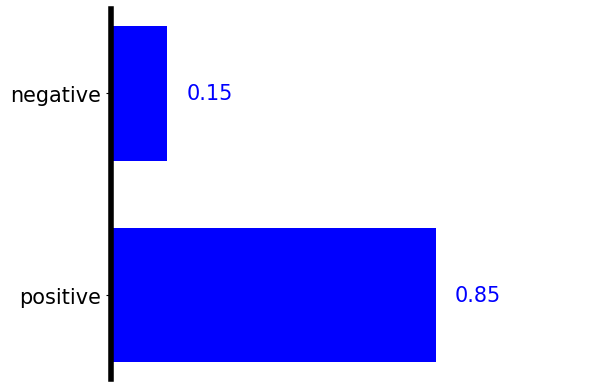

In [27]:
x = test_data[23]
tweet = tensor2text(x)
print('Tweet:', tweet)
print('Label:', test_label[23])
x = x.view(-1, 1)
scores = net(x.to(device))
p = F.softmax(scores, dim=1)
show_prob(p)

Tweet: tensor([1885, 1307,   14,   26,  221])


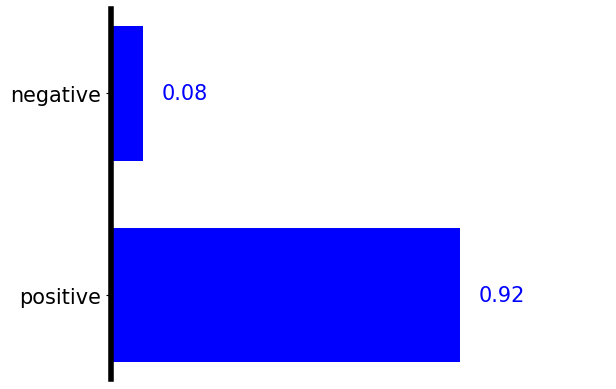

In [34]:
x = 'Deep learning is so cool'
tweet = text2tensor(x)
print('Tweet:', tweet)
tweet = tweet.view(-1, 1)
scores = net(tweet.to(device))
p = F.softmax(scores, dim=1)
show_prob(p)    

Tweet: tensor([ 10, 363, 593, 453, 116, 120,   0,   4,  12,  14,  26, 555,   3])


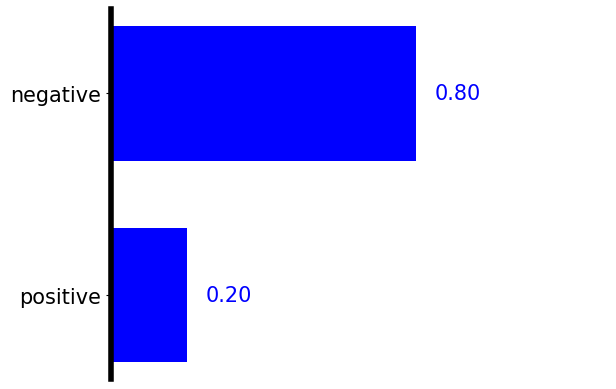

In [35]:
x = 'My least favorite class has been theology . It is so boring !'
tweet = text2tensor(x)
print('Tweet:', tweet)
tweet = tweet.view(-1, 1)
scores = net(tweet.to(device))
p = F.softmax(scores, dim=1)
show_prob(p)     

Tweet: tensor([   2,   56,    5, 5099,   32,   10,  220,   11,  377])


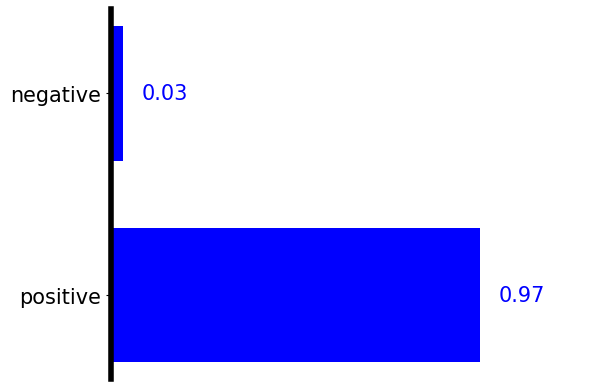

In [36]:
x = 'I love to hike with my friends and family'
tweet = text2tensor(x)
print('Tweet:', tweet)
tweet = tweet.view(-1, 1)
scores = net(tweet.to(device))
p = F.softmax(scores, dim=1)
show_prob(p) 

Tweet: tensor([ 715,   18,  919,  116,  120,   26, 3612,    4,   75,   12,   30,   33,
         156,  217,   15])


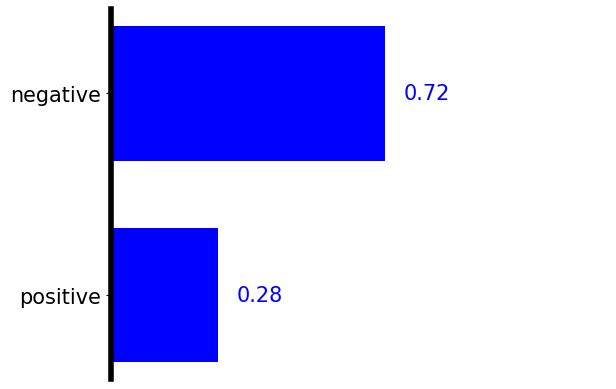

In [37]:
x = 'Studying for finals has been so stressful . Can it just be over already ?'
tweet = text2tensor(x)
print('Tweet:', tweet)
tweet = tweet.view(-1, 1)
scores = net(tweet.to(device))
p = F.softmax(scores, dim=1)
show_prob(p)     

Tweet: tensor([ 784,   14,    9,  326,   19,    0,   27, 4031,    2,   25, 1035,   12])


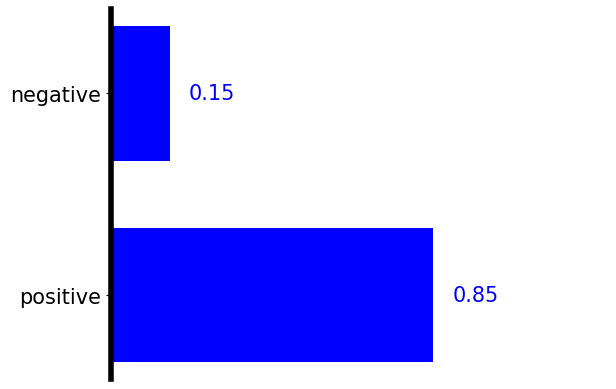

In [39]:
x = 'College is a lot of work, but overall I have enjoyed it'
tweet = text2tensor(x)
print('Tweet:', tweet)
tweet = tweet.view(-1, 1)
scores = net(tweet.to(device))
p = F.softmax(scores, dim=1)
show_prob(p)     

From these custom tweets, it seems that the model is making sophisticated predictions and the accuracy on the test set of 83.8% is not too bad.